<a href="https://colab.research.google.com/github/2303A52080/GenrativeAI/blob/main/Assignment_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Padded 1 zeros to the features.

Training with architecture: {'hidden_layers': 2, 'hidden_neurons': 64, 'activation_function': 'relu'}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
39/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7968 - loss: 0.9526

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8424 - loss: 0.7615 - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.8020e-04 - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.6705e-04 - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.7605e-04 - val_accuracy: 1.0000 - val_loss: nan
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: nan
Testing Accuracy for {'hidden_layers': 2, 'hidden_neurons': 64, 'activation_function': 'relu'}: 1.0000

Training with architecture: {'hidden_layers': 3, 'hidden_neurons': 32, 'activation_function': 'relu'}
Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6377 - loss: 1.3411 - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 

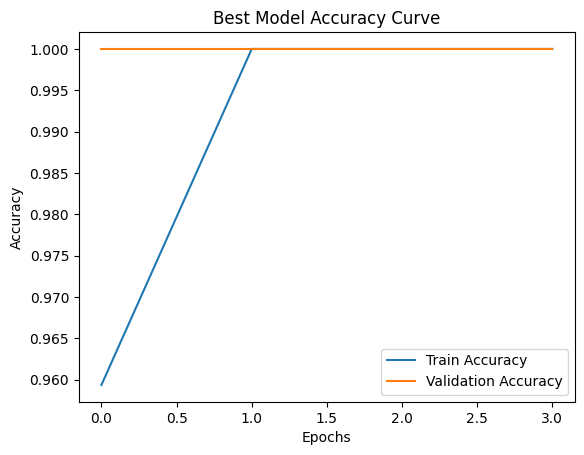

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Load MNIST dataset from CSV file
file_path = "mnist_dataset.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Splitting features (X) and labels (y)
y = df.iloc[:, 0].values  # First column is the label
X = df.iloc[:, 1:].values  # Remaining columns are pixel values

# Normalize pixel values (scale between 0 and 1)
X = X / 255.0

# ... (previous code)

# Reshape into 28x28 images (if needed)
# Assuming the first 784 columns represent the image data
# Check if the number of features is 784, if not, pad with zeros
num_features = X.shape[1]
if num_features < 784:
    padding_size = 784 - num_features
    X = np.pad(X, ((0, 0), (0, padding_size)), 'constant')  # Pad with zeros at the end
    print(f"Padded {padding_size} zeros to the features.")

X = X.reshape(-1, 28, 28, 1)
# Select the first 784 columns and then reshape

# ... (rest of the code)
# Convert labels to categorical (one-hot encoding)
y = tf.keras.utils.to_categorical(y, 10)

# Splitting into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the ANN model
def create_ann(hidden_layers, hidden_neurons, activation_function):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # Input layer
    for _ in range(hidden_layers):
        model.add(Dense(hidden_neurons, activation=activation_function))  # Hidden layers
    model.add(Dense(10, activation='softmax'))  # Output layer
    return model

# Training settings
epochs = 20
batch_size = 128

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode='max')

# Experiment with different architectures
architectures = [
    {'hidden_layers': 2, 'hidden_neurons': 64, 'activation_function': 'relu'},
    {'hidden_layers': 3, 'hidden_neurons': 32, 'activation_function': 'relu'},
    {'hidden_layers': 4, 'hidden_neurons': 128, 'activation_function': 'sigmoid'}
]

# Store results
results = []

for arch in architectures:
    print(f"\nTraining with architecture: {arch}")
    model = create_ann(arch['hidden_layers'], arch['hidden_neurons'], arch['activation_function'])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping, checkpoint]
    )

    # Evaluate accuracy
    _, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Testing Accuracy for {arch}: {test_accuracy:.4f}")

    results.append({'architecture': arch, 'test_accuracy': test_accuracy, 'history': history})

# Find the best model
best_result = max(results, key=lambda x: x['test_accuracy'])
print(f"\nBest Architecture: {best_result['architecture']}, Best Testing Accuracy: {best_result['test_accuracy']:.4f}")

# Plot accuracy curves of the best model
plt.plot(best_result['history'].history['accuracy'], label='Train Accuracy')
plt.plot(best_result['history'].history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Best Model Accuracy Curve")
plt.show()